In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM, Bidirectional


In [11]:
def plot_history(hst):
    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['acc']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_acc']], label='test')
    plt.title('Accuracy')    

    plt.ylim(0, 100)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [70]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

In [53]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [55]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)


In [56]:
model = Sequential()

model.add(Embedding(max_features, 32))
model.add(SimpleRNN(128))
model.add(Dense(1, activation='sigmoid'))

In [57]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [58]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
from keras.callbacks import EarlyStopping

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=10,
)

In [59]:
history = model.fit(input_train, y_train, epochs=50, batch_size=64, validation_split=0.3, callbacks=[callback])

Epoch 1/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 31s 111ms/step - acc: 0.5094 - loss: 0.6996 - val_acc: 0.5929 - val_loss: 0.6747
Epoch 2/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 30s 108ms/step - acc: 0.6169 - loss: 0.6507 - val_acc: 0.6255 - val_loss: 0.6318
Epoch 3/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 29s 107ms/step - acc: 0.7103 - loss: 0.5654 - val_acc: 0.7741 - val_loss: 0.4887
Epoch 4/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 30s 108ms/step - acc: 0.8249 - loss: 0.4042 - val_acc: 0.7935 - val_loss: 0.4638
Epoch 5/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 30s 110ms/step - acc: 0.8335 - loss: 0.3927 - val_acc: 0.8272 - val_loss: 0.4102
Epoch 6/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 30s 109ms/step - acc: 0.8507 - loss: 0.3624 - val_acc: 0.8137 - val_loss: 0.5239
Epoch 7/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 30s 108ms/step - acc: 0.8669 - loss: 0.3305 - val_acc: 0.8255 - val_loss: 0.4297
Epoch 8/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 31s 111ms/step - acc: 0.8591 - loss: 0.3475 - val_acc: 0.7627 - val_loss: 0.6998
Epoch 9/50
274/274 ━━━━━━━━━━━━━

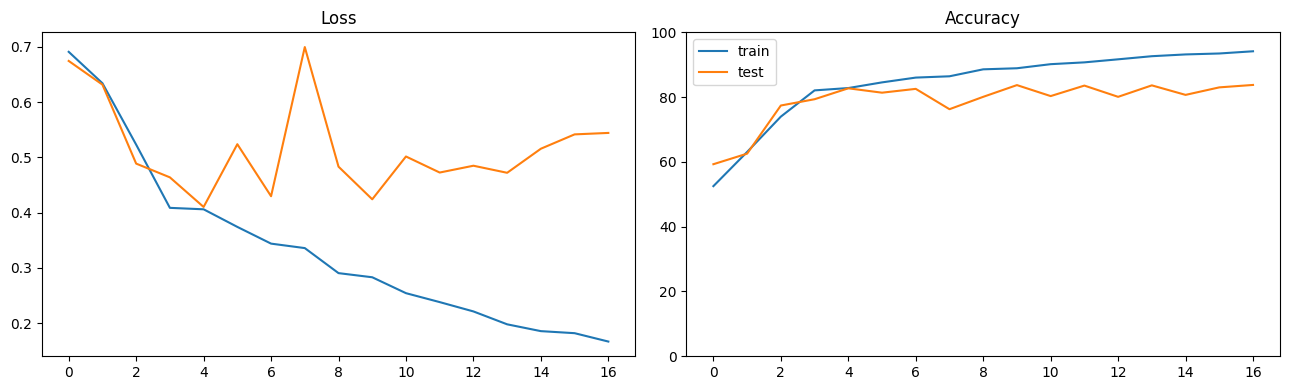

In [60]:
plot_history(history)

In [61]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))


782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - acc: 0.8333 - loss: 0.5605
Test Loss: 0.5528823137283325
Test Accuracy: 0.8343200087547302


GRU

In [62]:
model = Sequential()

model.add(Embedding(max_features, 32))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

In [63]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [68]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 326,369 (1.24 MB)

 Trainable params: 326,369 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5


ValueError: Attr 'Toutput_types' of 'OptionalFromValue' Op passed list of length 0 less than minimum 1.

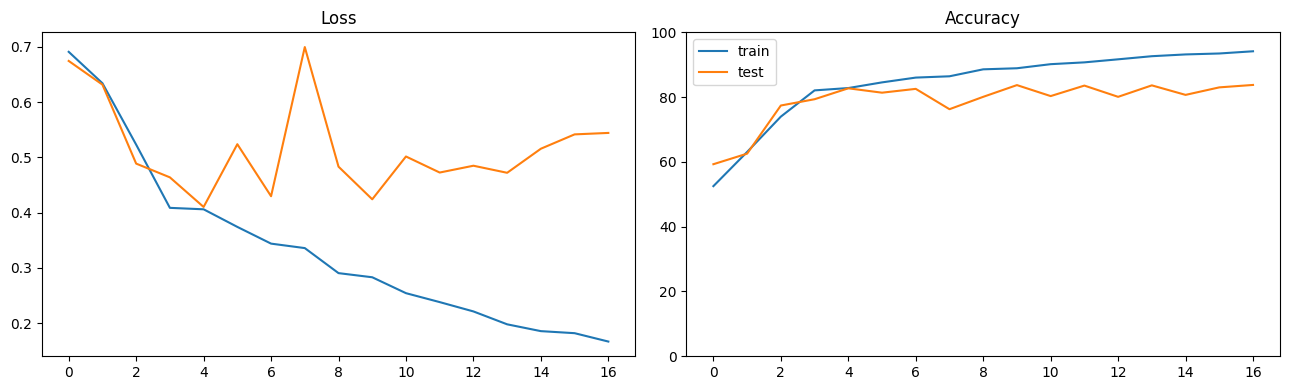

In [65]:
plot_history(history)

In [ ]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))


LSTM

In [71]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))


In [72]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [73]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 25s 173ms/step - acc: 0.5564 - loss: 0.6807 - val_acc: 0.7509 - val_loss: 0.5091
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 22s 160ms/step - acc: 0.7931 - loss: 0.4604 - val_acc: 0.8205 - val_loss: 0.4104
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 22s 162ms/step - acc: 0.8614 - loss: 0.3462 - val_acc: 0.8689 - val_loss: 0.3183
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 22s 161ms/step - acc: 0.8691 - loss: 0.3203 - val_acc: 0.8316 - val_loss: 0.3918
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 22s 161ms/step - acc: 0.8861 - loss: 0.2883 - val_acc: 0.8632 - val_loss: 0.3217


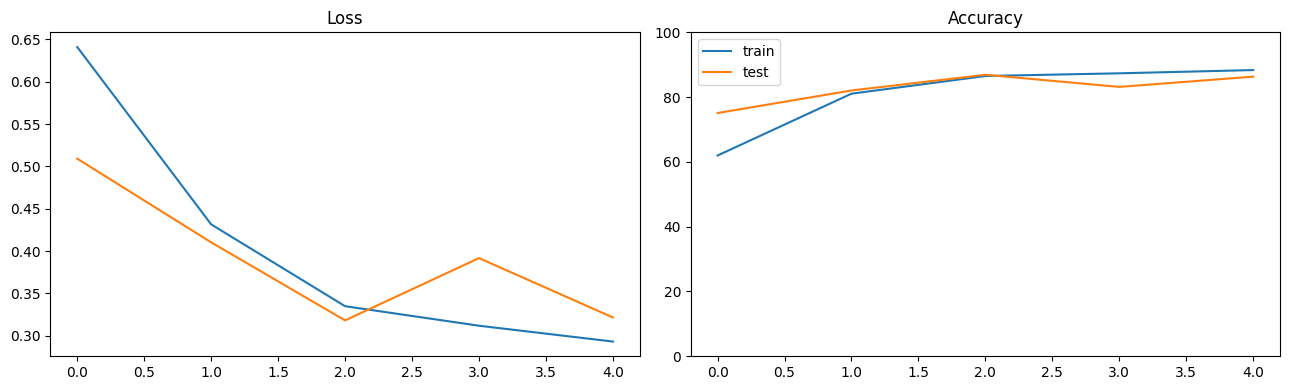

In [74]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
plot_history(history)

In [75]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))


782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - acc: 0.8617 - loss: 0.3276
Test Loss: 0.3231208324432373
Test Accuracy: 0.8637199997901917


BRNN

In [76]:
model = Sequential()

model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))


In [77]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [78]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 28s 196ms/step - acc: 0.5402 - loss: 0.6814 - val_acc: 0.7856 - val_loss: 0.5070
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 33s 242ms/step - acc: 0.7925 - loss: 0.4674 - val_acc: 0.8173 - val_loss: 0.4264
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 33s 242ms/step - acc: 0.8477 - loss: 0.3622 - val_acc: 0.8673 - val_loss: 0.3252
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 33s 242ms/step - acc: 0.8664 - loss: 0.3268 - val_acc: 0.7911 - val_loss: 0.4588
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 245ms/step - acc: 0.8851 - loss: 0.2845 - val_acc: 0.8789 - val_loss: 0.2993


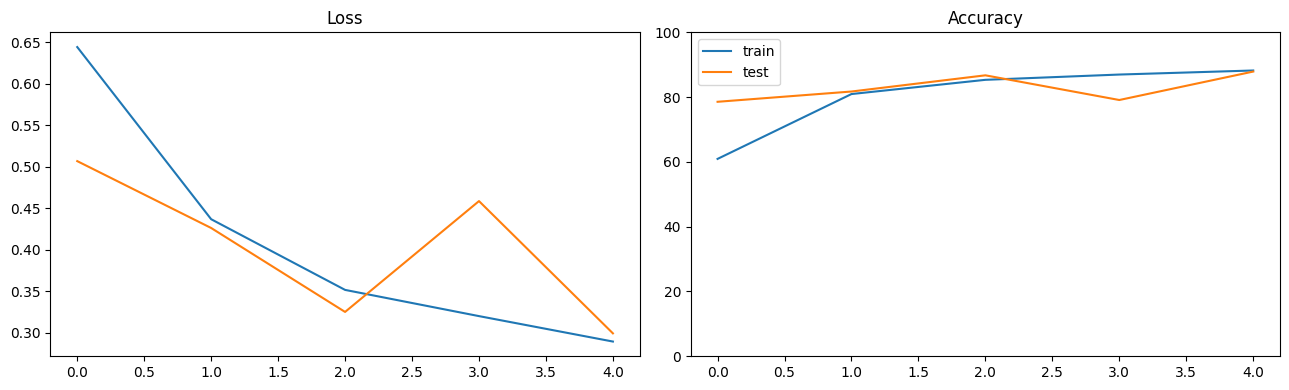

In [79]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
plot_history(history)

In [80]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))


782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - acc: 0.8709 - loss: 0.3083
Test Loss: 0.3059294819831848
Test Accuracy: 0.8723599910736084


DRNN

In [81]:
model = Sequential()

model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))


In [82]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [83]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 60s 425ms/step - acc: 0.5483 - loss: 0.6783 - val_acc: 0.7753 - val_loss: 0.4972
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 65s 478ms/step - acc: 0.7911 - loss: 0.4674 - val_acc: 0.8491 - val_loss: 0.3591
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 65s 477ms/step - acc: 0.8510 - loss: 0.3623 - val_acc: 0.8604 - val_loss: 0.3358
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 65s 478ms/step - acc: 0.8844 - loss: 0.2923 - val_acc: 0.7852 - val_loss: 0.5416
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 63s 462ms/step - acc: 0.8980 - loss: 0.2590 - val_acc: 0.8673 - val_loss: 0.3202


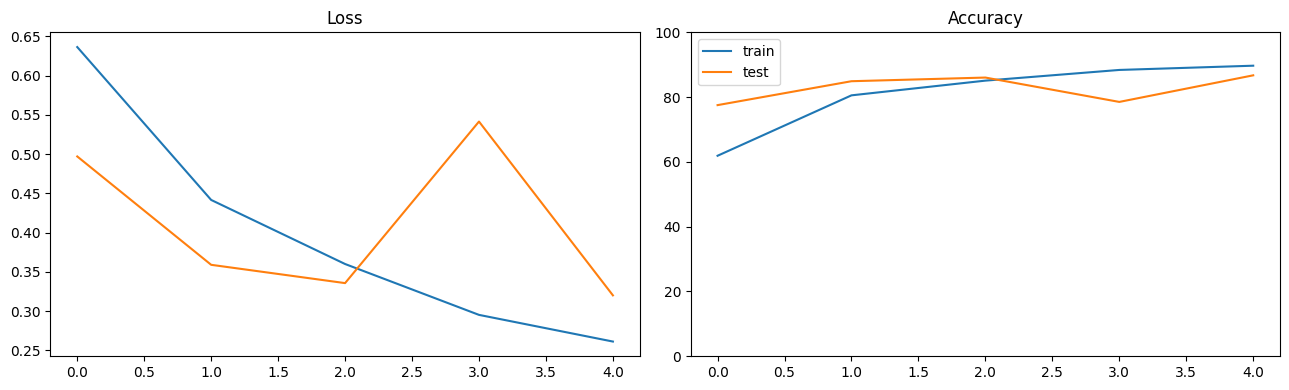

In [84]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
plot_history(history)

In [85]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))


782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - acc: 0.8675 - loss: 0.3247
Test Loss: 0.3188762962818146
Test Accuracy: 0.8698800206184387


Були протестовано різні види рекурентних моделей, результати показали, що brnn продемонструвала найвищу точність порівняно з іншими архітектурами, що вказує на її ефективність в опрацюванні послідовних даних і здатність враховувати контекст з обох боків.